In [1]:
import os
import cv2     # for capturing videos
import math 
import geocoder
import requests
%matplotlib inline
import pandas as pd
from twilio.rest import Client
from geopy.geocoders import Nominatim
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from matplotlib import pyplot as plt 
from skimage.transform import resize   # for resizing images

In [2]:
count = 0
videoFile = "Accidents.mp4"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


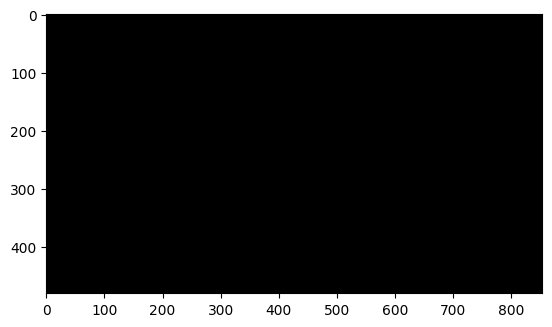

In [3]:
img = plt.imread('0.jpg')   # reading image using its name
plt.imshow(img)

In [4]:
data = pd.read_csv('mapping.csv')     # reading the csv file
data.head()

,Image_ID,Class
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [5]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [6]:
y = data.Class
dummy_y = np_utils.to_categorical(y) #one hot process done

In [7]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)
X = np.array(image)

In [8]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(X,data_format=None)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)

In [10]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [11]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) 

In [12]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

3/3 [==============================] - 8s 2s/step


((155, 7, 7, 512), (67, 7, 7, 512))

In [13]:
X_train = X_train.reshape(155, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(67, 7*7*512)

In [14]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [15]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(2, activation='softmax'))    # output layer

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 25,693,186
Trainable params: 25,693,186
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))
model.save('model.h5')

Epoch 1/100
5/5 [==============================] - 5s 752ms/step - loss: 0.6460 - accuracy: 0.6452 - val_loss: 0.8330 - val_accuracy: 0.6716
Epoch 2/100
5/5 [==============================] - 2s 473ms/step - loss: 0.5044 - accuracy: 0.7613 - val_loss: 0.8364 - val_accuracy: 0.6716
Epoch 3/100
5/5 [==============================] - 2s 461ms/step - loss: 0.3010 - accuracy: 0.8323 - val_loss: 0.9568 - val_accuracy: 0.6418
Epoch 4/100
5/5 [==============================] - 2s 459ms/step - loss: 0.1457 - accuracy: 0.9484 - val_loss: 0.9338 - val_accuracy: 0.7313
Epoch 5/100
5/5 [==============================] - 2s 458ms/step - loss: 0.1307 - accuracy: 0.9613 - val_loss: 0.8666 - val_accuracy: 0.7164
Epoch 6/100
5/5 [==============================] - 2s 440ms/step - loss: 0.0624 - accuracy: 1.0000 - val_loss: 0.9253 - val_accuracy: 0.7164
Epoch 7/100
5/5 [==============================] - 2s 447ms/step - loss: 0.0550 - accuracy: 0.9935 - val_loss: 0.8447 - val_accuracy: 0.7313
Epoch 8/100
5

In [20]:

model = keras.models.load_model('model.h5')

NameError: name 'keras' is not defined

In [21]:
count = 0
videoFile = "Accident-1.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="test%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


In [22]:
test = pd.read_csv('test.csv')

In [23]:
test_image = []
for img_name in test.Image_ID:
    img = plt.imread('' + img_name)
    test_image.append(img)
test_img = np.array(test_image)


In [24]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)


In [25]:
# preprocessing the images
test_image = preprocess_input(test_image, data_format=None)

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)
test_image.shape


1/1 [==============================] - 1s 1s/step


(9, 7, 7, 512)

In [26]:
test_image = test_image.reshape(9, 7*7*512)

# zero centered images
test_image = test_image/test_image.max()


In [27]:

predictions = model.predict(test_image)


1/1 [==============================] - 0s 104ms/step


In [28]:
print(predictions)


[[7.1417576e-06 9.9999285e-01]
 [4.7724321e-04 9.9952281e-01]
 [6.1644884e-03 9.9383551e-01]
 [2.4348004e-03 9.9756527e-01]
 [5.2715712e-03 9.9472851e-01]
 [6.1549288e-01 3.8450715e-01]
 [8.5160816e-01 1.4839186e-01]
 [6.4796567e-01 3.5203433e-01]
 [8.9549172e-01 1.0450832e-01]]


In [29]:
for i in range (0,9):
    if predictions[i][0]<predictions[i][1]:
        print("No Accident")
    else:
        print("Accident")
    

No Accident
No Accident
No Accident
No Accident
No Accident
Accident
Accident
Accident
Accident


In [ ]:
'''import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

# Plot the training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

'''

"import matplotlib.pyplot as plt\n\n# Train the model and store the history\nhistory = model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))\n\n# Plot the training and validation loss over time\nplt.plot(history.history['loss'])\nplt.plot(history.history['val_loss'])\nplt.title('Model Loss')\nplt.ylabel('Loss')\nplt.xlabel('Epoch')\nplt.legend(['Train', 'Validation'], loc='upper right')\nplt.show()\n\n# Plot the training and validation accuracy over time\nplt.plot(history.history['accuracy'])\nplt.plot(history.history['val_accuracy'])\nplt.title('Model Accuracy')\nplt.ylabel('Accuracy')\nplt.xlabel('Epoch')\nplt.legend(['Train', 'Validation'], loc='lower right')\n\n"

In [ ]:
'''plt.show()
plt.show()'''

'plt.show()\nplt.show()'

In [30]:
geoLoc = Nominatim(user_agent="GetLoc")
g = geocoder.ip('me')
locname = geoLoc.reverse(g.latlng)
account_sid = 'ACde7a1cc7e1e9cdc46c1d95bef1b3becc'
auth_token = '7c9f1c6e4ba1169a0cb6b6ee669681a1'
client = Client(account_sid, auth_token)

Status code Unknown from http://ipinfo.io/json: ERROR - HTTPConnectionPool(host='ipinfo.io', port=80): Max retries exceeded with url: /json (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001371C30EB90>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))


In [ ]:

cap = cv2.VideoCapture('Accident-1.mp4')
i=0
flag=0
while(True):
    ret,frame=cap.read()
    if ret==True:
        if predictions[int(i/15)%9][0]<predictions[int(i/15)%9][1]:
            predict="No Accident"
        else:
            predict="Accident"
            flag=1
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,
                predict,
                (50, 50),
                font, 1,
                (0, 255, 255),
                3,
                cv2.LINE_4)
        cv2.imshow('Frame', frame)
        i=i+1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
if flag==1:
    client.messages.create(
                 body="Accident detected in "+locname.address,
                 from_= '+15855132640',
                 to= '+917510764209' )

# release the cap object
cap.release()
# close all windows
cv2.destroyAllWindows()


In [ ]:
url = 'http://10.82.234.81:8080/video'


cap = cv2.VideoCapture(url)
'''cap = cv2.VideoCapture('Accident-1.mp4')'''
i=0
flag=0
while(True):
    ret,frame=cap.read()
    if ret==True:
        if predictions[int(i/15)%9][0]<predictions[int(i/15)%9][1]:
            predict="No Accident"
        else:
            predict="Accident"
            flag=1
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,
                predict,
                (50, 50),
                font, 1,
                (0, 255, 255),
                3,
                cv2.LINE_4)
        cv2.imshow('Frame', frame)
        i=i+1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
if flag==1:
    client.messages.create(
                 body="Accident detected in "+locname.address,
                 from_= '+15855132640',
                 to= '+917510764209' )

# release the cap object
cap.release()
# close all windows
cv2.destroyAllWindows()
